In [1]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np
from sklearn import metrics
#Loading the Data : 
data = pd.read_csv('C:\\Users\\Krishna Baghel\\Desktop\\vv\\yt_f_mos1_processing_regr.csv')
data.head()

,avg_si,avg_ti,max_si,max_ti,min_si,min_ti,num_frames,std_si,std_ti,bitrate,width,height,blur_avg,blur_min,blur_max,blur_std,MOS
0,67.761,11.486,149.348,43.906,0.000,0.000,599,56.717,14.722,39455067,1920,1080,487.469110,0.000000,1433.735087,535.098036,3.901
1,127.930,8.846,161.529,70.356,92.198,0.007,599,14.157,14.491,20173043,1920,1080,1996.931966,554.755396,10293.566930,1387.619823,3.940
2,114.687,3.601,139.886,22.136,86.393,0.000,600,13.476,2.806,35246779,1920,1080,754.504431,167.188913,1942.206195,429.063347,4.158
3,93.078,7.374,110.246,69.041,75.806,0.000,600,9.397,7.805,4884280,1920,1080,2995.681891,2161.869410,3685.894480,598.026164,4.189
4,82.019,21.565,105.680,39.132,52.316,0.003,599,17.192,12.612,45925284,1920,1080,220.564283,67.775987,415.174225,96.592576,3.791


In [2]:

# To define the input and output feature
x, y = data.iloc[:, :-1], data.iloc[:, -1]
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.11,random_state=42)

In [3]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 100,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [4]:

# laoding data
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [5]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[1]	valid_0's l2: 0.397542	valid_0's l1: 0.51801
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.380707	valid_0's l1: 0.505213
[3]	valid_0's l2: 0.365578	valid_0's l1: 0.493507
[4]	valid_0's l2: 0.352812	valid_0's l1: 0.483853
[5]	valid_0's l2: 0.34092	valid_0's l1: 0.474813
[6]	valid_0's l2: 0.328827	valid_0's l1: 0.464371
[7]	valid_0's l2: 0.318871	valid_0's l1: 0.455047
[8]	valid_0's l2: 0.310267	valid_0's l1: 0.44663
[9]	valid_0's l2: 0.301476	valid_0's l1: 0.438939
[10]	valid_0's l2: 0.29471	valid_0's l1: 0.432444
[11]	valid_0's l2: 0.288781	valid_0's l1: 0.42551
[12]	valid_0's l2: 0.28262	valid_0's l1: 0.419727
[13]	valid_0's l2: 0.277566	valid_0's l1: 0.414195
[14]	valid_0's l2: 0.273065	valid_0's l1: 0.408898
[15]	valid_0's l2: 0.269167	valid_0's l1: 0.404832
[16]	valid_0's l2: 0.265942	valid_0's l1: 0.40082
[17]	valid_0's l2: 0.260888	valid_0's l1: 0.396125
[18]	valid_0's l2: 0.25712	valid_0's l1: 0.392677
[19]	valid_0's l2: 0.253307	valid_0's 

C:\Users\Krishna Baghel\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [6]:
# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 0.23
RMSE: 0.48


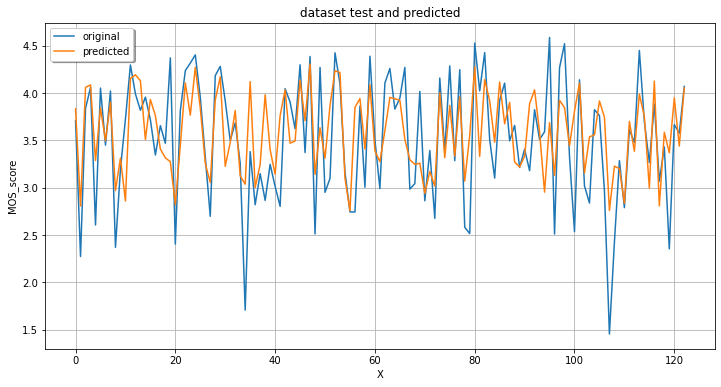

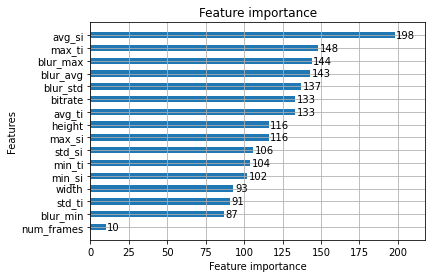

In [7]:

# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted")
plt.xlabel('X')
plt.ylabel('MOS_score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5) 

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2258589686735826

In [9]:
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.47524621899977554


In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


0.3560084171794008

In [11]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.3560084171794008


In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2) #this says this model R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data

0.4540163973072092


In [13]:
import pandas as pd
from scipy.stats import pearsonr
corr,_=pearsonr(y_test, y_pred)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.683


In [14]:
import scipy.stats
def spearmans_rank_correlation(x, y):
     
    # Calculate the rank of x's
    xranks = pd.Series(x).rank()
    print("Rankings of X:")
    print(xranks)
     
    # Calculate the ranking of the y's
    yranks = pd.Series(y).rank()
    print("Rankings of Y:")
    print(yranks)
     
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    print("Spearman's Rank correlation:",scipy.stats.pearsonr(xranks, yranks)[0])
 
# Call the function
spearmans_rank_correlation(y_test, y_pred)

Rankings of X:
993     71.0
101      3.0
486     80.0
862     95.0
1075    13.0
        ... 
1085    53.0
23       4.0
721     68.0
367     62.0
541     96.0
Name: MOS , Length: 123, dtype: float64
Rankings of Y:
0       78.0
1        3.0
2      105.0
3      106.0
4       35.0
       ...  
118     63.0
119     44.0
120     96.0
121     50.0
122    104.0
Length: 123, dtype: float64
Spearman's Rank correlation: 0.6938785381381355


In [15]:
from scipy.stats import kendalltau
corr, _ = kendalltau(y_test, y_pred)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.51127


In [24]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

np.random.seed(1)
#print(train.shape, test.shape, y.shape)

#categoricals = ['COL_A','COL_B']
#indexes_of_categories = [train.columns.get_loc(col) for col in categoricals]

gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(x_train, y_train)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc',categorical_feature=indexes_of_categories)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=train, y=y)

print(lgb_model.best_params_, lgb_model.best_score_)

NameError: name 'indexes_of_categories' is not defined